In [1]:
#Importing required packages and libraries
#Keras module
import keras   
#Attributes of Keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
#Matplotib Attribute
import matplotlib.pyplot as plt
%matplotlib inline
#Numpy module
import numpy as np

Using TensorFlow backend.
C:\Users\rakes\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rakes\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rakes\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rakes\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#Importing Dataset
from keras.datasets import mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()
#Loads a dataset of Handwritten digits from 1 to 10

In [3]:
#Normalizing Dataset
train_img = keras.utils.normalize(train_img, axis=1)
test_img = keras.utils.normalize(test_img, axis =1)

In [4]:
#Building Model
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation="softmax"))

In [5]:
#Compiling Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [6]:
#Fitting the Model
model.fit(train_img, train_lab, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.2207 - accuracy: 0.9319
Epoch 2/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0899 - accuracy: 0.9725
Epoch 3/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0615 - accuracy: 0.9806
Epoch 4/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0460 - accuracy: 0.9850
Epoch 5/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0353 - accuracy: 0.9885
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.0307 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0251 - accuracy: 0.9918
Epoch 8/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.0210 - accuracy: 0.9932
Epoch 9/10
60000/60000 [==============================] - 10s 165us/step - loss: 0.0178 - accuracy: 0.9941
Epoch 10/10
60000/60000 [===========

In [7]:
#Evaluate the Model
print(model.evaluate(test_img, test_lab))

10000/10000 [==============================] - 0s 37us/step
[0.09938165663271212, 0.9779999852180481]


In [10]:
#Predicting First 10 test images
pred = model.predict(test_img[:20])
# print(pred)
p=np.argmax(pred, axis=1)
print(p)
print(test_lab[:20])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


C:\Users\rakes\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


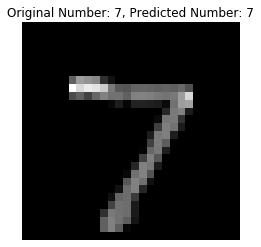

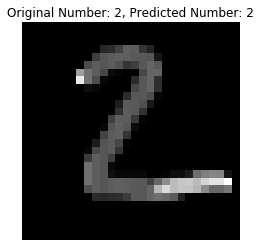

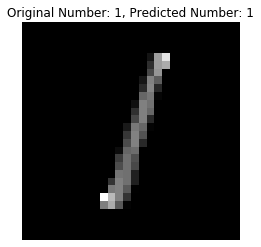

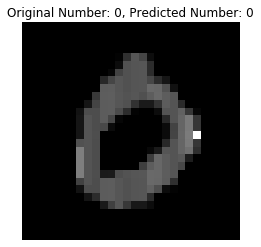

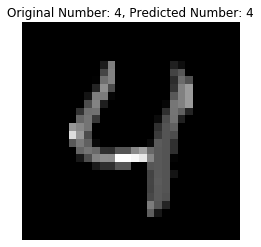

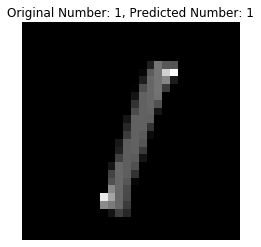

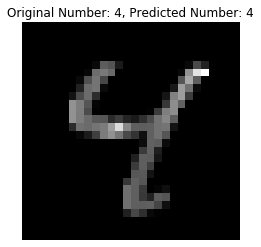

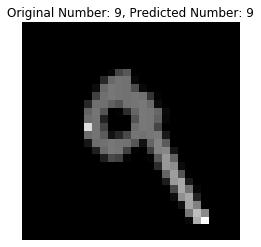

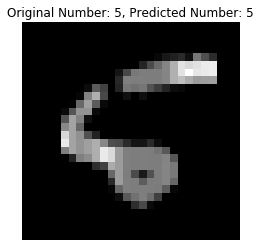

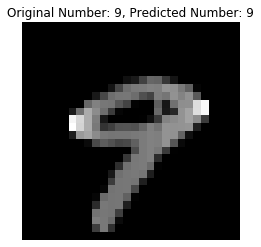

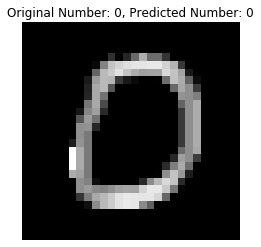

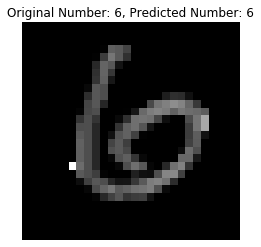

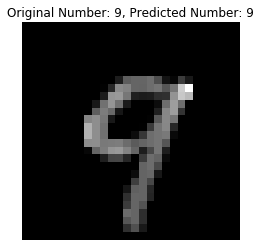

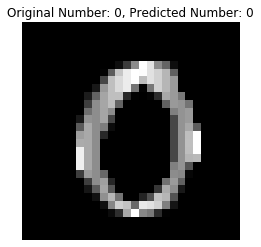

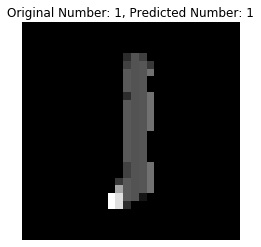

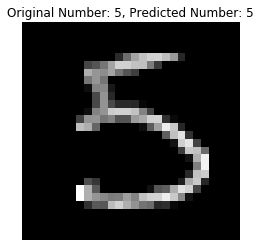

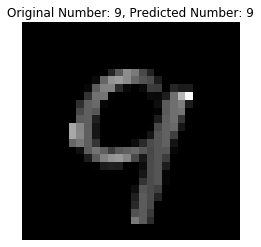

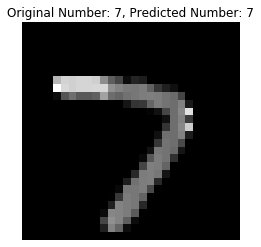

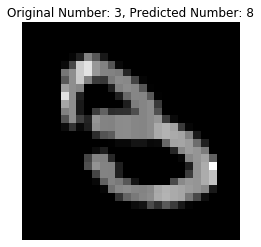

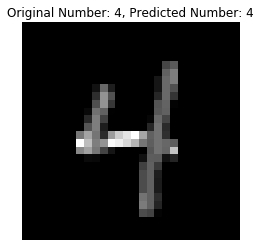

<Figure size 432x288 with 0 Axes>

In [16]:
#Visualizing prediction
for i in range(20):
  plt.imshow(test_img[i], cmap='gray')
  plt.title("Original Number: {}, Predicted Number: {}".format(test_lab[i], p[i]))
  plt.axis("off")
  plt.figure()